# GLASS PCA - Univariate outlier detection

Imprting dependencies


In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

Loading the glass file from the "data folder"

In [2]:
glass_data = np.genfromtxt('data/glass.data', delimiter = ",")


In [3]:
print(f"Number \t RI \t Na \t Mg \t Al \t Si \t K \t Ca \t Ba \t Fe \t Type")

#Normalizing the data

normalized_data = (glass_data-glass_data.min(axis =0))/(glass_data.max(axis = 0)-glass_data.min(axis = 0))
print(normalized_data)

Number 	 RI 	 Na 	 Mg 	 Al 	 Si 	 K 	 Ca 	 Ba 	 Fe 	 Type
[[0.         0.43283582 0.43759398 ... 0.         0.         0.        ]
 [0.00469484 0.28358209 0.47518797 ... 0.         0.         0.        ]
 [0.00938967 0.22080773 0.42105263 ... 0.         0.         0.        ]
 ...
 [0.99061033 0.41703248 0.54586466 ... 0.52063492 0.         1.        ]
 [0.99530516 0.23529412 0.54887218 ... 0.4984127  0.         1.        ]
 [1.         0.26163301 0.52631579 ... 0.53015873 0.         1.        ]]


We have glass types, and we want to find outliers WITHIN the different class types.
That is $P(outlier|Type)$

In [4]:
class1 = normalized_data[glass_data[:,-1] == 1][:,1:-1]
class2 = normalized_data[glass_data[:,-1] == 2][:,1:-1]
class3 = normalized_data[glass_data[:,-1] == 3][:,1:-1]
#class4 = glass_data[glass_data[:,-1] == 4][:,1:-1]
class5 = normalized_data[glass_data[:,-1] == 5][:,1:-1]
class6 = normalized_data[glass_data[:,-1] == 6][:,1:-1]
class7 = normalized_data[glass_data[:,-1] == 7][:,1:-1]


class1_name = glass_data[glass_data[:,-1] == 1][:,0]
class2_name = glass_data[glass_data[:,-1] == 2][:,0]
class3_name = glass_data[glass_data[:,-1] == 3][:,0]
class5_name = glass_data[glass_data[:,-1] == 5][:,0]
class6_name = glass_data[glass_data[:,-1] == 6][:,0]
class7_name = glass_data[glass_data[:,-1] == 7][:,0]


glass_on_class_data = [class1,
                               class2,
                               class3,
                               #class4,
                               class5,
                               class6,
                               class7]


glass_name_on_glass = [class1_name,
                       class2_name,
                       class3_name,
                       class5_name,
                       class6_name,
                       class7_name]

"""
Outliers
4.0
33.0
71.0
73.0
94.0
180.0
193.0
195.0
214.0
"""

outliers = normalized_data[[3,32,70,72,93,179,192,194,213],:]



Creating the PCA class:

In [5]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
    
    def fit(self, X):
        # Step 1: Standardize the data (subtract the mean)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort the eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # Step 6: Project the data onto the selected components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def plot_explained_variance(self):
        # Create labels for each principal component
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Create a bar plot for explained variance
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Principal Components')
        plt.show()

Outlier detection given that we know the class of glass


________GLASS_TYPE_1_________


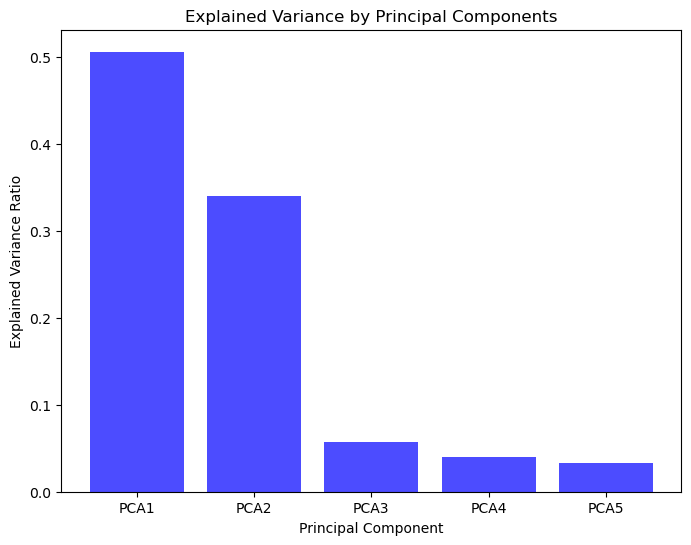

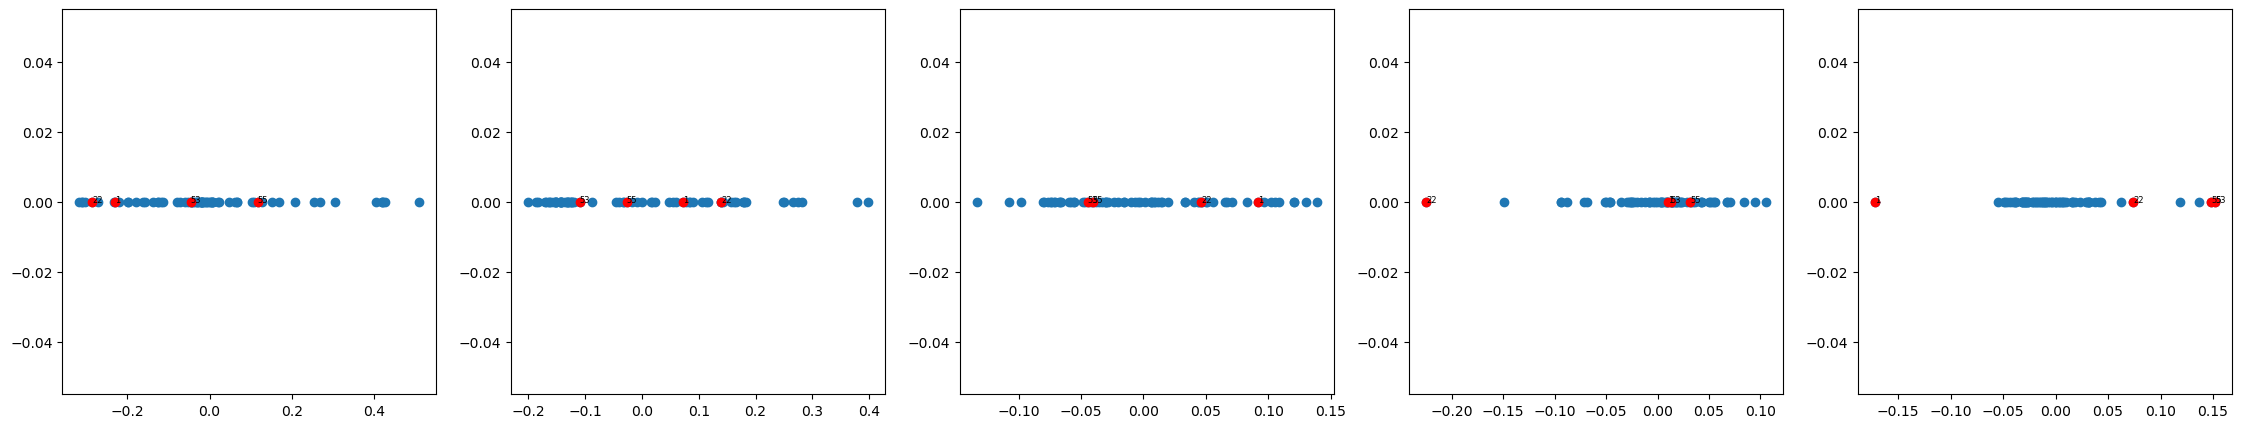

Detected outliers are [ 1. 22. 53. 55.]

________GLASS_TYPE_2_________


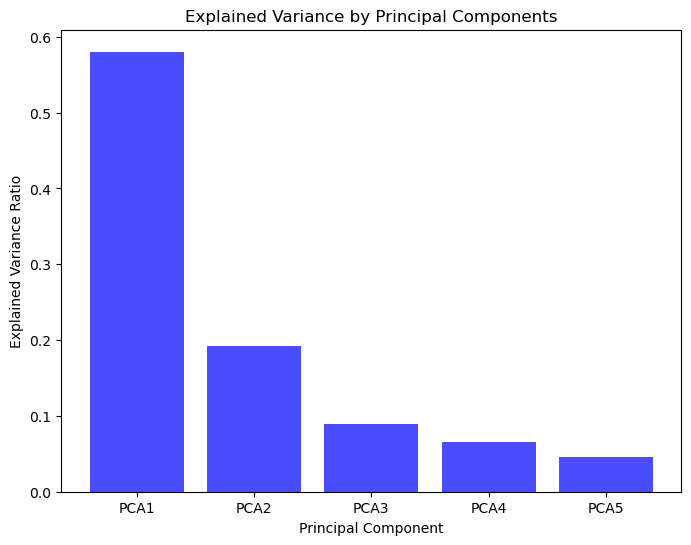

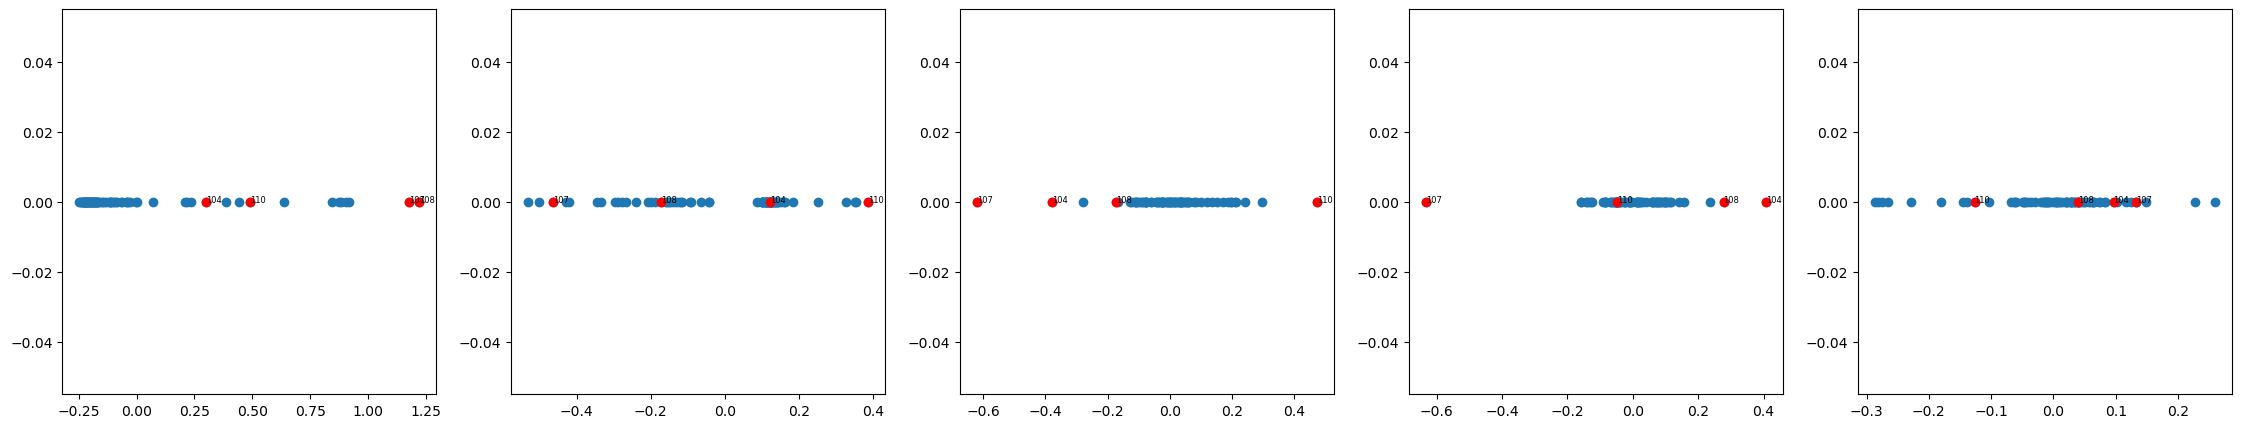

Detected outliers are [104. 107. 108. 110.]

________GLASS_TYPE_3_________


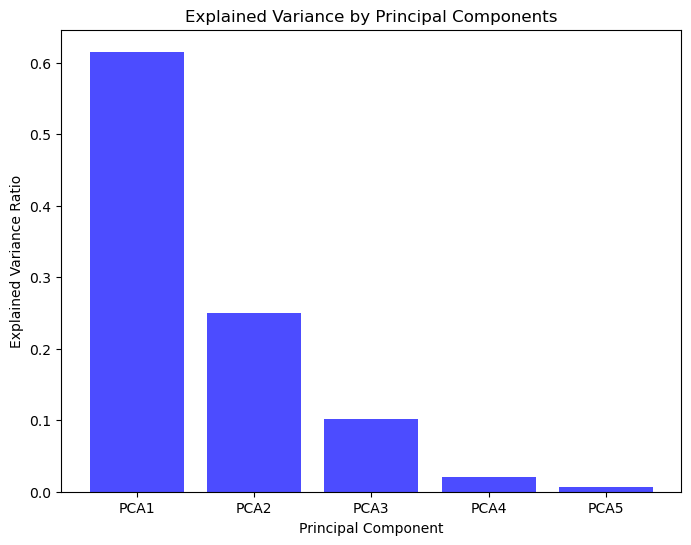

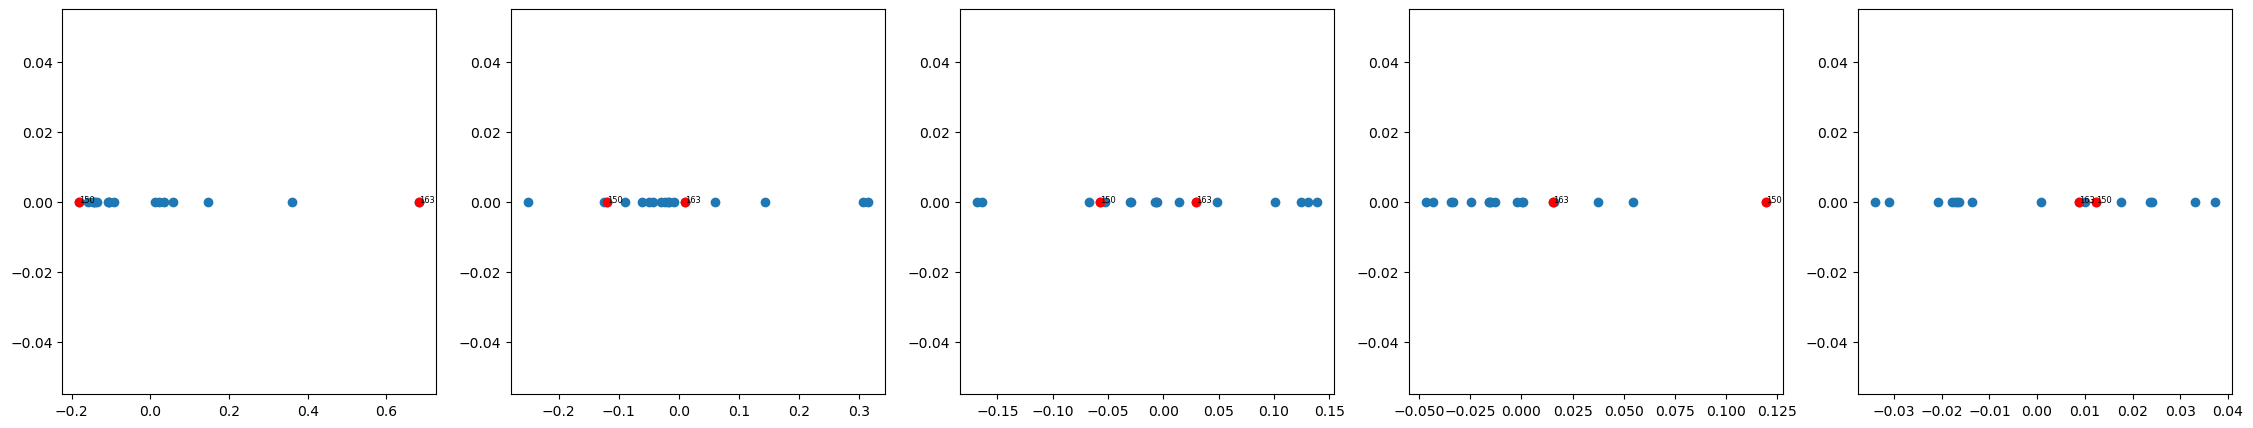

Detected outliers are [150. 163.]

________GLASS_TYPE_4_________


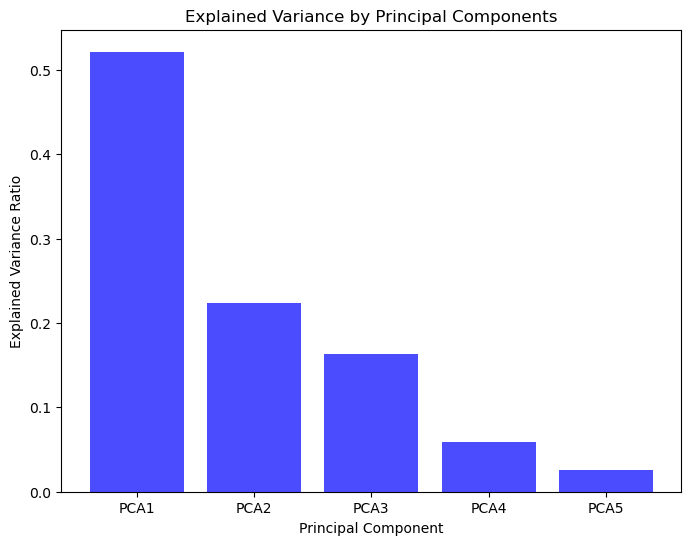

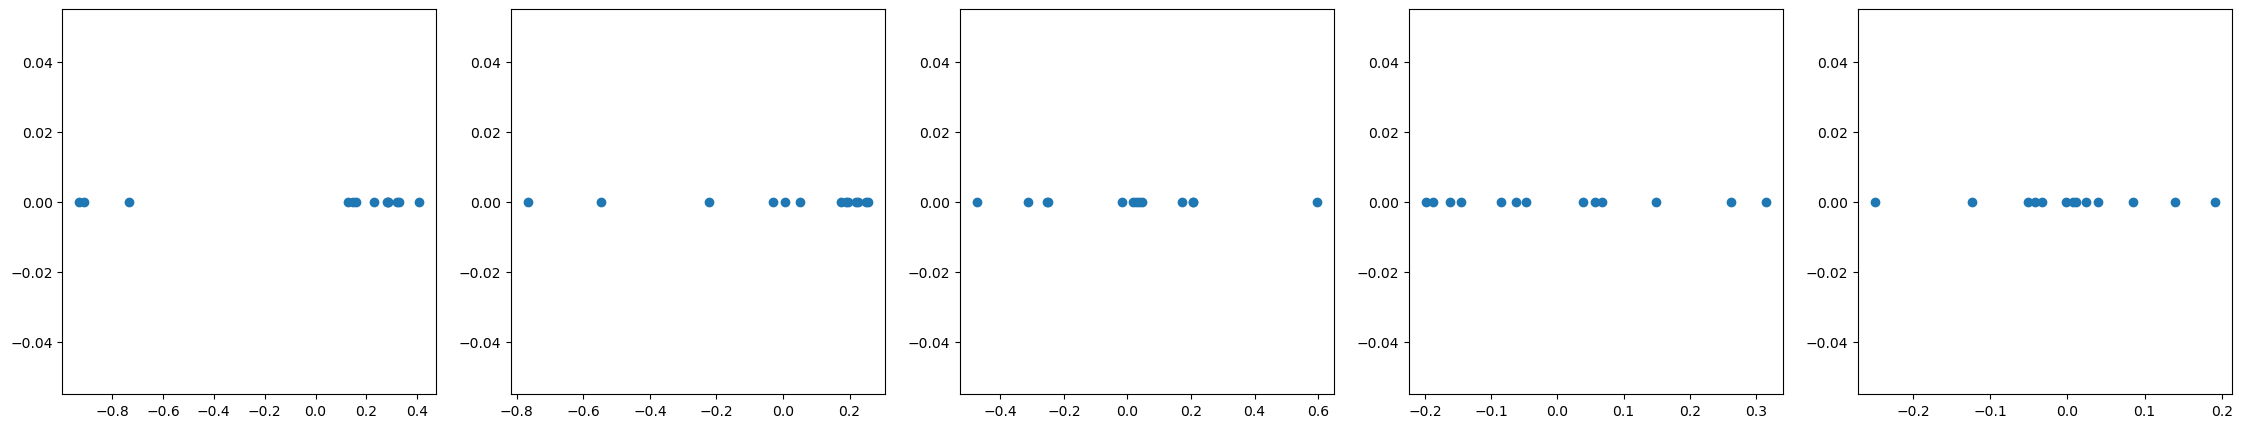

Detected outliers are []

________GLASS_TYPE_5_________


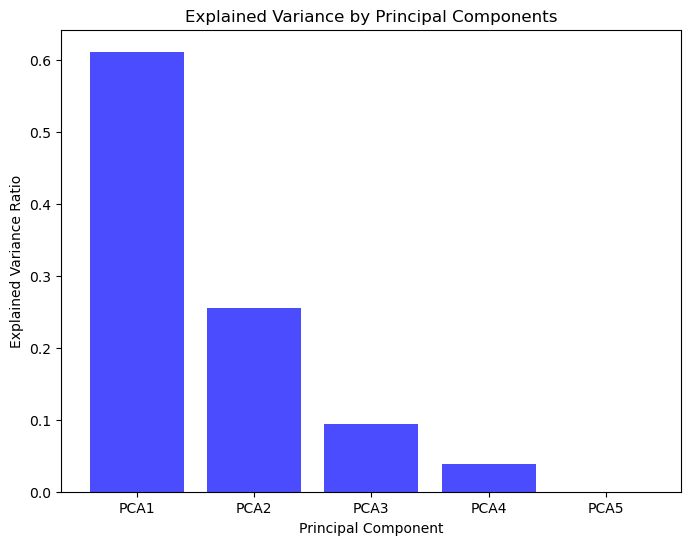

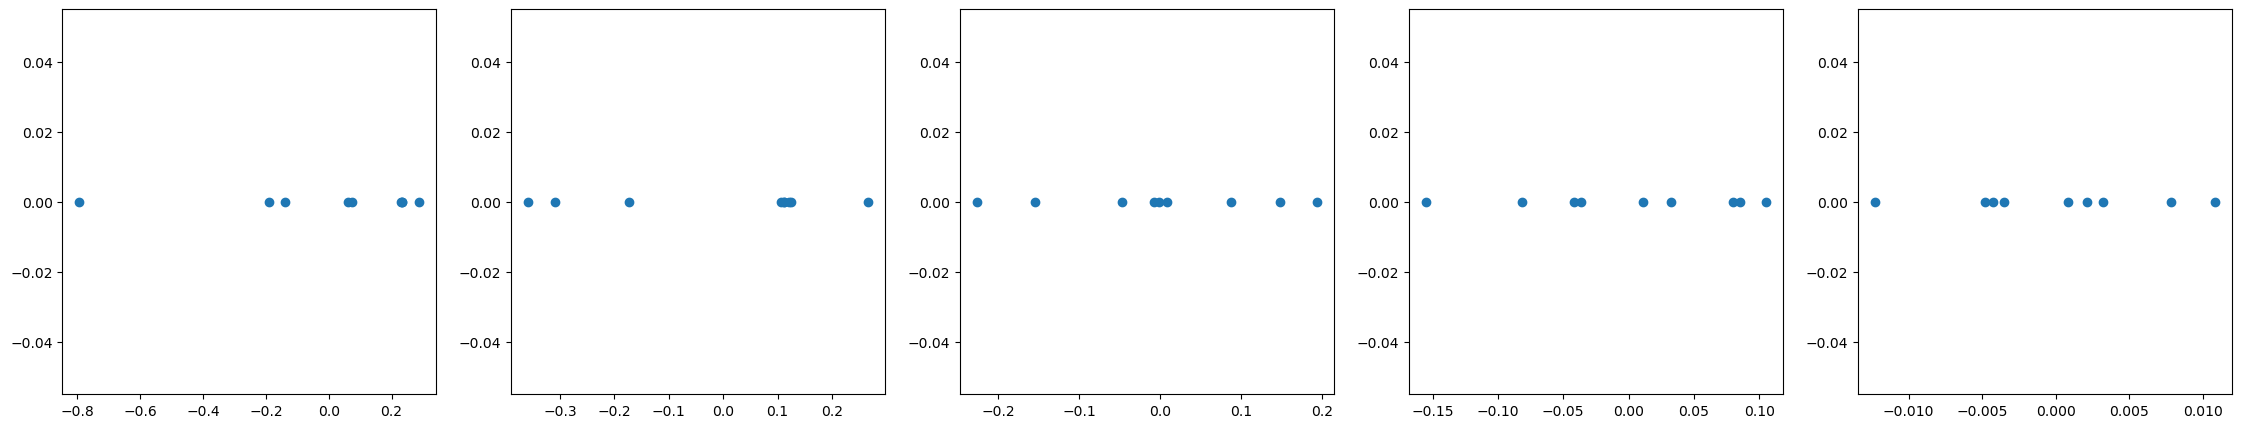

Detected outliers are []

________GLASS_TYPE_6_________


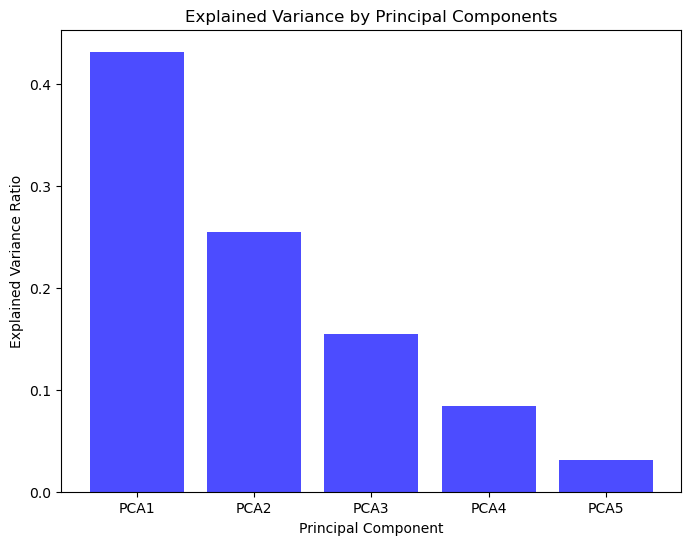

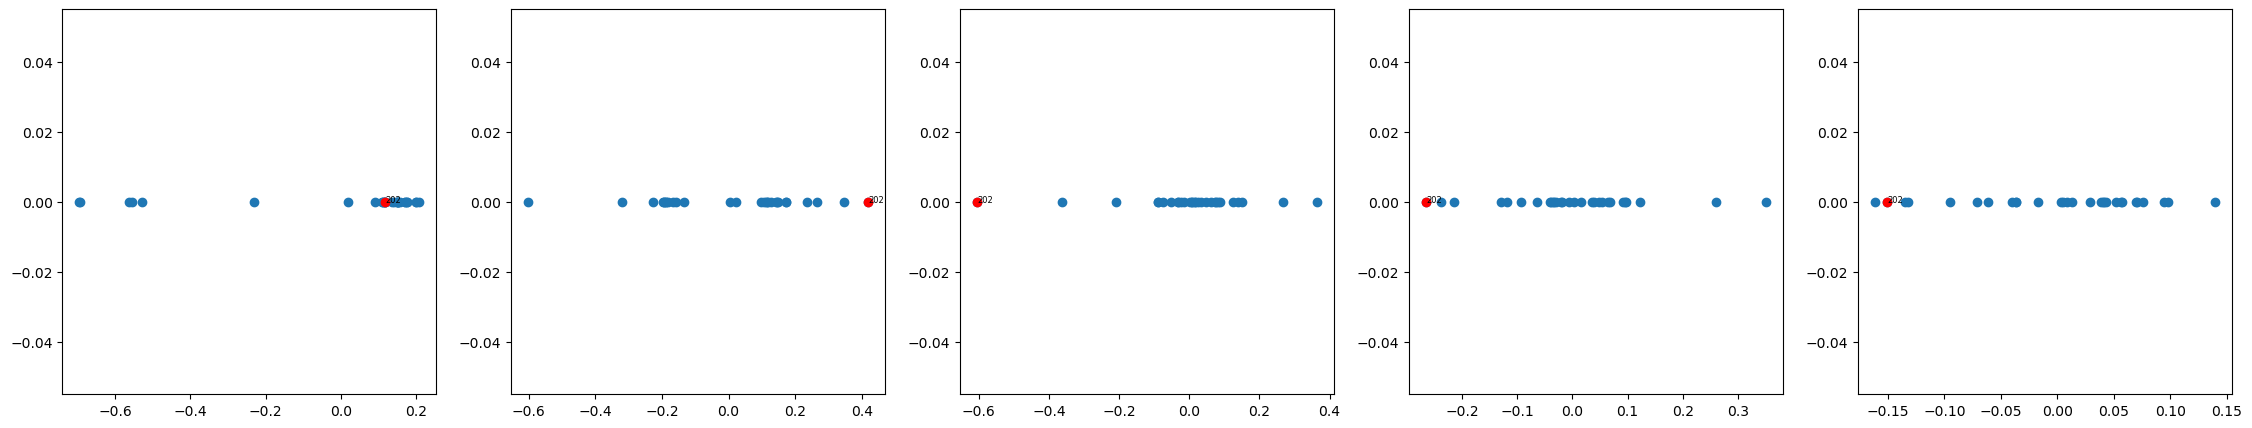

Detected outliers are [202.]


In [27]:
# Apply PCA
n_pc = 5

for idx, e in enumerate(glass_on_class_data):
    print(f"\n________GLASS_TYPE_{idx+1}_________")
    pca = PCA(n_components=n_pc)
    pca.fit(e)
    x_transformed = pca.transform(e)

    pca.plot_explained_variance()
    

    avg = np.average(x_transformed,axis = 0)
    std = np.std(x_transformed,axis = 0)

    z_score = np.absolute(((x_transformed-avg)/std))
    trueFalse = z_score >3

    outlier = np.any(trueFalse, axis = 1)
    
    
    fig, axes = plt.subplots(nrows = 1, ncols = n_pc, figsize = (28,5))
    for n in range(n_pc):
        
        axes[n].scatter(x_transformed[:,n], np.zeros(len(x_transformed[:,n])))
        axes[n].scatter(x_transformed[outlier,n], np.zeros(len(x_transformed[outlier,n])), color = "r")
        for name, cord in zip(glass_name_on_glass[idx][outlier],x_transformed[outlier,n]):
            axes[n].annotate(str(int(name)),(cord, 0), size = 6 )
        
    plt.show()

    print(f"Detected outliers are {glass_name_on_glass[idx][outlier]}")



# Outlier detection independent on class

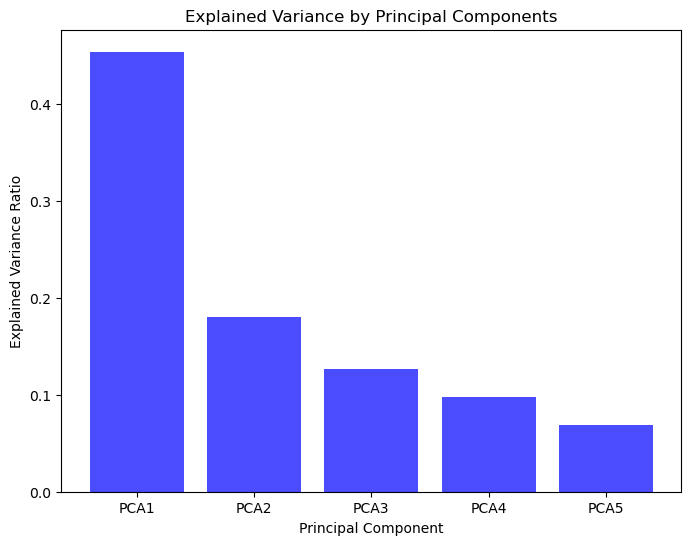

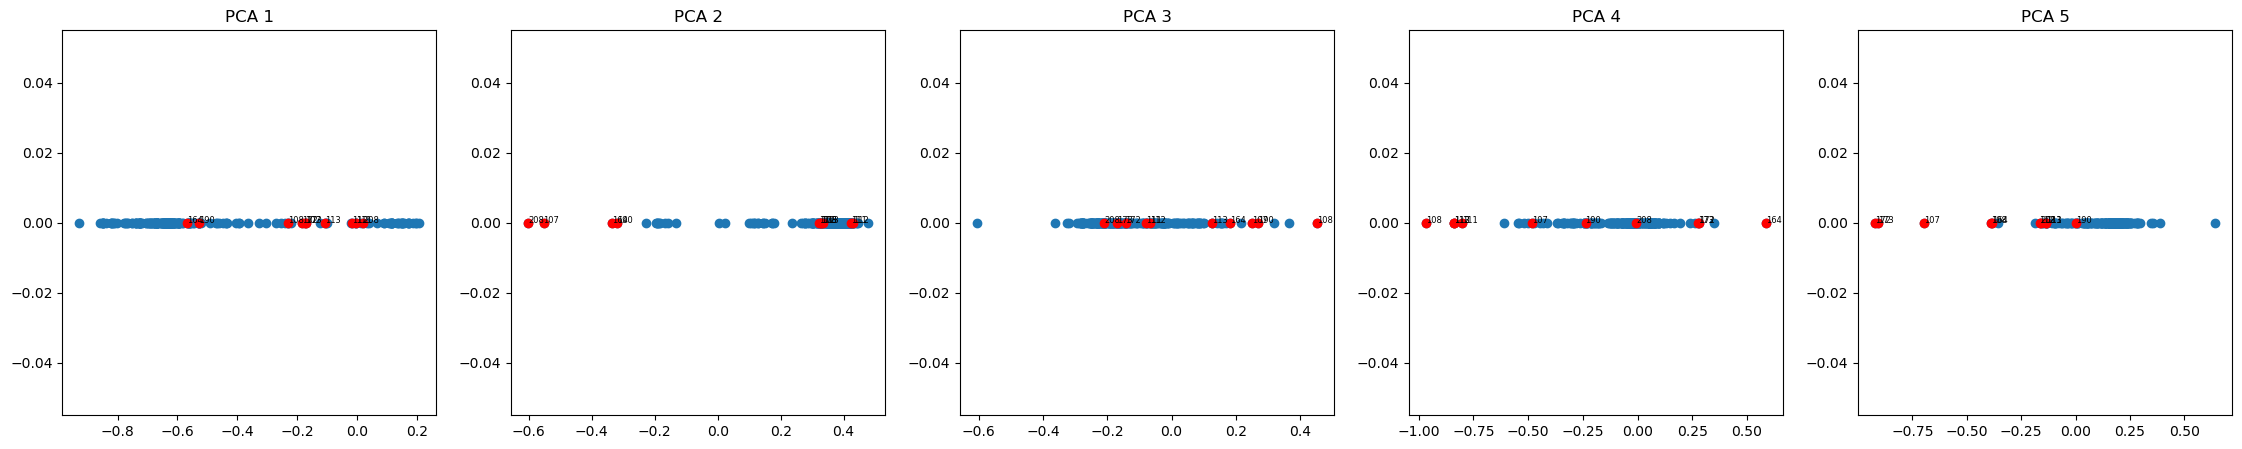

Suspected outliers are [107. 108. 111. 112. 113. 164. 172. 173. 190. 208.]


In [28]:
pca2 = PCA(n_components=n_pc)
pca2.fit(normalized_data[:,1:-1])
x_transformed_2 = pca.transform(normalized_data[:,1:-1])

pca2.plot_explained_variance()
avg = np.average(x_transformed_2,axis = 0)

std = np.std(x_transformed_2,axis = 0)

z_score = np.absolute(((x_transformed_2-avg)/std))
trueFalse = z_score >3.5

outlier = np.any(trueFalse, axis = 1)
fig, axes = plt.subplots(nrows = 1, ncols = n_pc, figsize = (28,5))
for n in range(n_pc):
        axes[n].set_title(f"PCA {n+1}")
        axes[n].scatter(x_transformed_2[:,n], np.zeros(len(x_transformed_2[:,n])))
        axes[n].scatter(x_transformed_2[outlier,n], np.zeros(len(x_transformed_2[outlier,n])), color = "r")
        for name, cord in zip(glass_data[outlier,0],x_transformed_2[outlier,n]):
            axes[n].annotate(str(int(name)),(cord, 0), size = 6 )
        
plt.show()

print(f'Suspected outliers are {glass_data[outlier,0]}')


# Results

Not that good according to method #1, based on class, it is 